In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#pd.set_option('display.max_columns', None,'display.max_rows', None)
pd.set_option('display.max_columns', None)

ModuleNotFoundError: No module named 'seaborn'

In [6]:
Member = pd.read_csv('~/Box Sync/KenyaPovertyTargetingModel/1data/KSPS/UNHCR-KEN-2018-SEA-Kalobeyei-Member.csv')
Nonfood = pd.read_csv('~/Box Sync/KenyaPovertyTargetingModel/1data/KSPS/UNHCR-KEN-2018-SEA-Kalobeyei-Nonfood.csv')
MergeTotalSpend = pd.read_excel('../2progs/MergeTotalSpend.xlsx',sheet_name='Sheet1',index_col = 0)

In [7]:
# Nonfood cleaning

Nonfood = Nonfood.rename(columns={"s1q2":"hhlocation", 
                        "s12q9":"purchased", 
                        "s12q10": "cost"})

Nonfood = Nonfood.drop(['weight','g_recall','nfcons_value',
                        'nfcons_value_capita','popweight',
                        's12q11'], axis=1)

NFSum = pd.DataFrame(Nonfood.groupby('hhid')['cost'].sum())

In [8]:
NFSum['cost'].describe()

count     1100.000000
mean       566.227334
std        671.954678
min          0.000000
25%        175.142148
50%        376.036130
75%        716.974637
max      10983.177150
Name: cost, dtype: float64

In [9]:
# Member cleaning
Member = Member.rename(columns={"s1q2":"hhlocation",
                                "s1q5":"interviewConsent",
                                "s2q8":"mainRespondent",
                                "s2q18":"hhHead",
                            #Demographic
                                "s2q11":"gender",
                                "s2q12":"ageRange",
                                "s2q13":"countryOfOrigin",
                            #Education
                                "s4q1":"anyEducation",
                                "s4q2":"currentlyInSchool",
                                "s4q3":"currentGrade",
                                "s4q4":"highestEducation",
                            ## Education -- Skills
                                "s4q5":"speaks",
                                "s4q6":"reads",
                                "s4q7":"writes",
                                "s4q8":"usesTech",
                                "s4q9":"drives",
                            # Employment 
                                "s5q1":"employee",
                                "s5q2":"employer",
                                "s5q3":"farmWorker",
                                "s5q4":"farmHelper",
                                "s5q5":"apprentice",
                                "s5q6":"volunteer",
                                "s5q20":"occupationStatus",
                                "s5q24":"numberOfIncomeActivities7days",
                            # Disabilities
                                "s9q2":"DifficultSeeing",
                                "s9q2_a":"glasses",
                                "s9q3":"DifficultHearing",
                                "s9q3_a":"hearingAid",
                                "s9q4":"difficultWalking",
                                "s9q5":"difficultMemory",
                                "s9q6":"difficultSelfCare",
                                "s9q7":"difficultCommunicate"})


Member = Member.drop(['weight',
# s5q7-14 ask about absenteeism at work
's5q7','s5q8','s5q9','s5q10','s5q11','s5q12','s5q13_1','s5q13_2','s5q13_3','s5q14','s5q14_b',
# s5q17-19 asks about what steps were taken in subject's job search
's5q17','s5q18','s5q19',
# s5q22 "How soon would he/she be able to start work if offered one"                 
's5q22',
# s5q23 is covered in s5q20
's5q23',
# Dr. told me to remove these
's5q25','s5q15','s5q16','s5q21','mainRespondent',
# Mean was 1                    
'interviewConsent' ,  
# Included in other sets
'ind_unique','indid','hhlocation',"s2q7a"
], axis=1)

MemberRaw=Member.copy()


In [10]:
## Cleaning variable inputs
Member.hhHead = MemberRaw.hhHead.map(dict(Yes=1, No=0))
Member.gender = MemberRaw.gender.map(dict(Female=1, Male=0))
Member.anyEducation = MemberRaw.anyEducation.map(dict(Yes=1, No=0))
Member.speaks = MemberRaw.speaks.map(dict(Yes=1, No=0))
Member.reads = MemberRaw.reads.map(dict(Yes=1, No=0))
Member.writes = MemberRaw.writes.map(dict(Yes=1, No=0))                                    
                                     

                                     


In [11]:
## Age Manipulation
ageDict = {"00 to 04": 0,
           "05 to 09": 1,
           "10 to 14": 2,
           "15 to 19": 3,
           "20 to 24": 4,
           "25 to 29": 5,
           "30 to 44": 6,
           "35 to 39": 7,
           "40 to 44": 8,
           "45 to 49": 9,
           "50 to 54": 10,
           "55 to 59": 11,
           "60 or more": 12}

Member.ageRange=Member.ageRange.replace(ageDict)
Member.ageRange=Member.ageRange.fillna(13)



In [12]:
# combine highest education and current grade
Member.highestEducation = Member.highestEducation.fillna(Member.currentGrade)
Member.highestEducation = Member.highestEducation.fillna(0)
# turn into numbers
eduDict = {"Early childhood education":1,
           "Primary": 2,
           "Secondary": 3,
           "Vocational training (more than 1 year, with government certificate)":4,
           "University":5,
           "Other": 6}

Member.highestEducation=Member.highestEducation.replace(eduDict)




In [13]:
Member[Member['hhid'] == 12]

,hhid,hhHead,gender,ageRange,countryOfOrigin,anyEducation,currentlyInSchool,currentGrade,highestEducation,speaks,...,speak_swahili,speak_other,read_arabic,read_english,read_swahili,read_other,write_arabic,write_english,write_swahili,write_other
11,12,1,1,6.0,South Sudan,0.0,NaN,NaN,0,1.0,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,12,0,1,2.0,South Sudan,1.0,Yes,Primary,2,1.0,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,12,0,1,2.0,South Sudan,1.0,Yes,Primary,2,1.0,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,12,0,1,1.0,South Sudan,1.0,Yes,Early childhood education,1,1.0,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,12,0,0,1.0,South Sudan,1.0,Yes,Early childhood education,1,1.0,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,12,0,1,0.0,South Sudan,NaN,NaN,NaN,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
Member[Member['hhid'] == 2863]
#share age unknown

,hhid,hhHead,gender,ageRange,countryOfOrigin,anyEducation,currentlyInSchool,currentGrade,highestEducation,speaks,...,speak_swahili,speak_other,read_arabic,read_english,read_swahili,read_other,write_arabic,write_english,write_swahili,write_other
3182,2863,1,1,13.0,Ethiopia,0.0,NaN,NaN,0,1.0,...,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#Member[Member['hhid'] = 72]----play around with this, may not have all hhid w/ age, create extra column w/ age unknown

In [16]:
# Create DF to test data regarding head of household
HeadMember = Member.query('hhHead==1')


foo = pd.DataFrame({
# Column to count hhsize
    'size': Member.groupby('hhid')['gender'].count(),
# Colomn for houshold head is female 
    'headFemale':HeadMember.groupby('hhid')['gender'].mean(),
# Column for share of house is female
    'shareFemale':Member.groupby('hhid')['gender'].mean(),
# Share by Age stuff
    'shareAgeZeroToFour':Member.query('ageRange==0').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareAgeFiveToNine':Member.query('ageRange==1').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareAgeTenToFourteen':Member.query('ageRange==2').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareAgeFifteenToTwentyfour':Member.query('ageRange==3|ageRange==4').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareAgeTwentyfivetofourtynine':Member.query('ageRange==5|ageRange==6|ageRange==7|ageRange==8|ageRange==9').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareAgeFiftyPlus':Member.query('ageRange==10|ageRange==11|ageRange==12').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareMaleAgeTenToNineteen':Member.query('gender==0&(ageRange==2|ageRange==3)').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareFemaleAgeTenToNineteen':Member.query('gender==1&(ageRange==2|ageRange==3)').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareMaleAgeTwentytoFourtynine':Member.query('gender==0&(ageRange==4|ageRange==5|ageRange==6|ageRange==7|ageRange==8|ageRange==9)').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareFemaleAgeTwentytoFourtynine':Member.query('gender==1&(ageRange==4|ageRange==5|ageRange==6|ageRange==7|ageRange==8|ageRange==9)').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
    'shareAgeNaN':Member.query('ageRange==13').
                        groupby('hhid')['ageRange'].count()/
                        Member.groupby('hhid')['gender'].count(),
# Highest Education Shares
    'shareWithNoEducation': Member.query('highestEducation==0 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithEarlyChildhood': Member.query('highestEducation==1 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithPrimary':Member.query('highestEducation==2 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithSecondary':Member.query('highestEducation==3 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithVocational':Member.query('highestEducation==4 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithUniversity':Member.query('highestEducation==5 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWithOther':Member.query('highestEducation==6 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
# Share 5-10 that speaks
    'shareSpeaks': Member.query('speaks==1 & ageRange==1').
                        groupby('hhid')['speaks'].count()/
                        Member.query('ageRange==1').
                            groupby('hhid')['ageRange'].count(),
# Reads
    'shareReads':Member.query('reads==1 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    'shareWrites':Member.query('writes==1 & ageRange>=4').
                        groupby('hhid')['highestEducation'].count()/
                        Member.query('ageRange>=4').
                            groupby('hhid')['ageRange'].count(),
    }).fillna(0)

# change it to NA if there is no person for the last ones for share speaks

foo.shareSpeaks.min()


    

0.0

In [17]:
foo.query('shareAgeNaN!=0.0')

,size,headFemale,shareFemale,shareAgeZeroToFour,shareAgeFiveToNine,shareAgeTenToFourteen,shareAgeFifteenToTwentyfour,shareAgeTwentyfivetofourtynine,shareAgeFiftyPlus,shareMaleAgeTenToNineteen,...,shareWithNoEducation,shareWithEarlyChildhood,shareWithPrimary,shareWithSecondary,shareWithVocational,shareWithUniversity,shareWithOther,shareSpeaks,shareReads,shareWrites
hhid,,,,,,,,,,,,,,,,,,,,,
72,8,1,0.375000,0.375000,0.250000,0.000000,0.000000,0.250000,0.0,0.000000,...,0.666667,0.0,0.000000,0.333333,0.0,0.0,0.000000,1.0,0.333333,0.333333
184,5,1,0.600000,0.200000,0.200000,0.000000,0.000000,0.400000,0.0,0.000000,...,1.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.000000,0.000000
211,8,0,0.625000,0.250000,0.250000,0.125000,0.000000,0.125000,0.0,0.000000,...,0.333333,0.0,0.000000,0.333333,0.0,0.0,0.333333,0.0,0.666667,0.666667
238,12,0,0.416667,0.083333,0.250000,0.166667,0.250000,0.166667,0.0,0.083333,...,0.250000,0.0,0.250000,0.250000,0.0,0.0,0.250000,1.0,0.500000,0.500000
251,9,1,0.333333,0.000000,0.333333,0.333333,0.111111,0.111111,0.0,0.333333,...,0.500000,0.0,0.000000,0.500000,0.0,0.0,0.000000,1.0,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5591,7,0,0.714286,0.142857,0.142857,0.428571,0.000000,0.142857,0.0,0.142857,...,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,1.0,1.000000,1.000000
5643,9,0,0.777778,0.333333,0.111111,0.222222,0.000000,0.222222,0.0,0.000000,...,0.666667,0.0,0.333333,0.000000,0.0,0.0,0.000000,1.0,0.666667,0.666667
5666,4,1,0.750000,0.250000,0.250000,0.000000,0.000000,0.250000,0.0,0.000000,...,0.000000,0.0,0.500000,0.500000,0.0,0.0,0.000000,1.0,0.500000,0.500000


In [18]:
NFSum.describe()

,cost
count,1100.000000
mean,566.227334
std,671.954678
min,0.000000
25%,175.142148
50%,376.036130
75%,716.974637
max,10983.177150


In [19]:

NFSum

,cost
hhid,
10,1031.994440
11,94.158150
12,282.654090
14,159.810690
15,596.885089
...,...
5977,210.000000
5986,618.490350
5992,0.000000


In [20]:
Nonfood.isnull().sum()

hhid              0
hhlocation        0
hhsize            0
hhmod             0
mod_opt           0
item_name         0
purchased         0
cost          11803
dtype: int64

<AxesSubplot:>

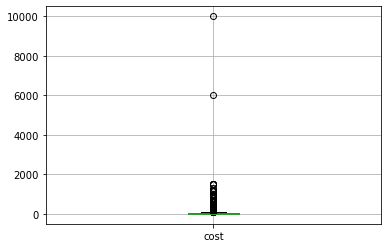

In [21]:
Nonfood.boxplot(column=['cost'])

In [22]:
#Outlier Treatment
Nonfood['cost'] = np.where(Nonfood['cost'] > 2000, 2000, Nonfood['cost'])

<AxesSubplot:>

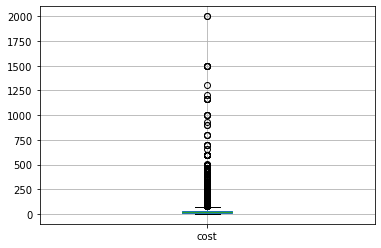

In [23]:
#Even using outliers it still looks skewed 
Nonfood.boxplot(column=['cost'])

<AxesSubplot:>

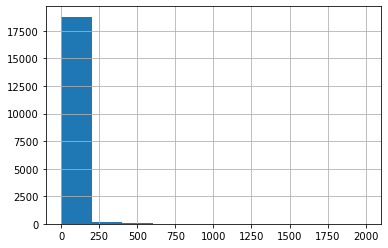

In [24]:
#Most households have a cost of zero and the 20 mean is just due to the very high numbers 
Nonfood.cost.hist()

<AxesSubplot:>

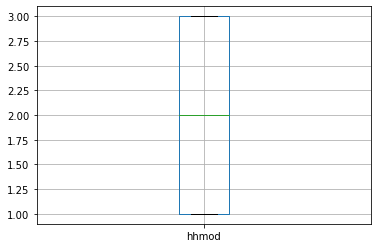

In [25]:
Nonfood.boxplot(column=['hhmod'])

In [26]:
#foo['total_share_age'] = foo['shareAgeZeroToFour'] + foo['shareAgeFiveToNine'] + foo['shareAgeTenToFourteen']+ foo['shareAgeFifteenToTwentyfour']+ foo['shareAgeTwentyfivetofourtynine']+ foo['shareAgeFiftyPlus']

In [27]:
#add every household share to 1, tabulate to 1, find household that doesn't equal 1
#unknown category?----
#aggregate up to household level----then merge!

In [28]:
foo[['headFemale', 'shareFemale','shareAgeZeroToFour','shareAgeFiveToNine', 'shareAgeTenToFourteen', 
    'shareAgeFifteenToTwentyfour', 'shareAgeTwentyfivetofourtynine', 'shareAgeFiftyPlus', 'shareAgeNaN','shareMaleAgeTenToNineteen',
    'shareFemaleAgeTenToNineteen', 'shareMaleAgeTwentytoFourtynine', 'shareFemaleAgeTwentytoFourtynine',
    'shareWithNoEducation', 'shareWithEarlyChildhood', 'shareWithPrimary', 'shareWithSecondary', 'shareWithVocational',
    'shareWithUniversity', 'shareWithOther', 'shareSpeaks', 'shareReads', 'shareWrites']].describe().T[['mean', 'std', 'count']].set_axis(['Head Female', 'Share Female', '% Members Aged 0-4', '% Members Aged 5-9',
                                                                                                                                          '% Members Aged 10-14', '% Members Aged 15-24', '% Members Aged 25-49',
                                                                                                                                          '% Members Over Age 50', '% Members Missing', '% Male Members Aged 10-19', '% Female Members Aged 10-19',
                                                                                                                                          '% Male Members Aged 20-49', '% Female Members Aged 20-49', '% Members with No Education',
                                                                                                                                          '% Members with Early Childhood Education', '% Members with Primary Education',
                                                                                                                                       '% Members with Secondary Education',  '% Members with Vocational Education',
                                                                                                                                           '% Members with University Education',  '% Members with Other Education',
                                                                                                                                          '% Members who Speak', '% Members who Read', '% Members who Write'], axis = 'index').set_axis(['Mean', 'Std', 'N'], axis='columns')                      

#kids who speak vs. members? ---N should be 18000
                                                                                                                                           
#only 3 significant digits, N has no significant digits                                                                                                                                         
#means should add up to 1 for overlapping                                                                                                                                                                                                                   
#bring food dataset to 1100----N= 1100, aggregate food/member datasets

,Mean,Std,N
Head Female,0.656364,0.475138,1100.0
Share Female,0.486591,0.256838,1100.0
% Members Aged 0-4,0.190559,0.166233,1100.0
% Members Aged 5-9,0.189400,0.167080,1100.0
% Members Aged 10-14,0.147136,0.155367,1100.0
% Members Aged 15-24,0.221062,0.254292,1100.0
% Members Aged 25-49,0.219246,0.231350,1100.0
% Members Over Age 50,0.014324,0.072152,1100.0
% Members Missing,0.018273,0.096378,1100.0
% Male Members Aged 10-19,0.156110,0.197156,1100.0


In [29]:
foo['issue'] = 1- (foo['shareAgeZeroToFour'] + foo['shareAgeFiveToNine'] + foo['shareAgeTenToFourteen'] + 
                                        foo['shareAgeFifteenToTwentyfour'] + foo['shareAgeTwentyfivetofourtynine']+
                                        foo['shareAgeFiftyPlus']) 
#share in Na's in 

In [30]:
foo.sort_values(by=['issue'], ascending=False)

,size,headFemale,shareFemale,shareAgeZeroToFour,shareAgeFiveToNine,shareAgeTenToFourteen,shareAgeFifteenToTwentyfour,shareAgeTwentyfivetofourtynine,shareAgeFiftyPlus,shareMaleAgeTenToNineteen,...,shareWithEarlyChildhood,shareWithPrimary,shareWithSecondary,shareWithVocational,shareWithUniversity,shareWithOther,shareSpeaks,shareReads,shareWrites,issue
hhid,,,,,,,,,,,,,,,,,,,,,
2863,1,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000e+00
4766,1,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000e+00
4554,1,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,1.000000e+00
814,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000e+00
2699,1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,...,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,1.000000,1.000000,1.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2173,9,1,0.666667,0.222222,0.111111,0.222222,0.333333,0.111111,0.00,0.222222,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000e+00
2174,4,0,0.500000,0.250000,0.250000,0.000000,0.000000,0.250000,0.25,0.000000,...,0.0,0.5,0.0,0.000000,0.0,0.0,1.0,0.000000,0.000000,0.000000e+00
2175,4,1,0.750000,0.000000,0.750000,0.000000,0.000000,0.250000,0.00,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,1.000000,1.000000,0.000000e+00


In [31]:
foo[['size','shareAgeZeroToFour', 'shareAgeFiveToNine', 'shareAgeTenToFourteen', 'shareAgeFifteenToTwentyfour',
    'shareAgeTwentyfivetofourtynine', 'shareAgeFiftyPlus', 'issue']]

,size,shareAgeZeroToFour,shareAgeFiveToNine,shareAgeTenToFourteen,shareAgeFifteenToTwentyfour,shareAgeTwentyfivetofourtynine,shareAgeFiftyPlus,issue
hhid,,,,,,,,
10,5,0.200000,0.400000,0.200000,0.000000,0.200000,0.000000,0.000000e+00
11,6,0.000000,0.000000,0.166667,0.666667,0.166667,0.000000,1.110223e-16
12,6,0.166667,0.333333,0.333333,0.000000,0.166667,0.000000,1.110223e-16
14,14,0.285714,0.285714,0.142857,0.142857,0.071429,0.071429,2.220446e-16
15,2,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000e+00
...,...,...,...,...,...,...,...,...
5977,15,0.000000,0.133333,0.333333,0.400000,0.066667,0.066667,0.000000e+00
5986,2,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000e+00
5992,1,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00


In [32]:
foo.describe()

,size,headFemale,shareFemale,shareAgeZeroToFour,shareAgeFiveToNine,shareAgeTenToFourteen,shareAgeFifteenToTwentyfour,shareAgeTwentyfivetofourtynine,shareAgeFiftyPlus,shareMaleAgeTenToNineteen,...,shareWithEarlyChildhood,shareWithPrimary,shareWithSecondary,shareWithVocational,shareWithUniversity,shareWithOther,shareSpeaks,shareReads,shareWrites,issue
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.00000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.00000,1.100000e+03
mean,5.758182,0.656364,0.486591,0.190559,0.18940,0.147136,0.221062,0.219246,0.014324,0.156110,...,0.001212,0.284221,0.155619,0.024394,0.017045,0.017955,0.654061,0.474394,0.46000,1.827277e-02
std,3.087100,0.475138,0.256838,0.166233,0.16708,0.155367,0.254292,0.231350,0.072152,0.197156,...,0.031773,0.386788,0.307703,0.130078,0.113508,0.112472,0.472966,0.442724,0.43779,9.637826e-02
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-2.220446e-16
25%,4.000000,0.000000,0.333333,0.000000,0.00000,0.000000,0.000000,0.083333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00
50%,6.000000,1.000000,0.500000,0.200000,0.20000,0.142857,0.166667,0.166667,0.000000,0.125000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.50000,0.000000e+00
75%,8.000000,1.000000,0.666667,0.333333,0.30000,0.250000,0.333333,0.250000,0.000000,0.250000,...,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.00000,0.000000e+00
max,21.000000,1.000000,1.000000,0.750000,0.80000,0.666667,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000e+00


In [37]:
FinalMerge = pd.merge(foo, MergeTotalSpend, how = "inner", on = "hhid")

In [38]:
FinalMerge.to_excel('FinalMerge.xlsx',sheet_name='Sheet1')

ModuleNotFoundError: No module named 'openpyxl'

In [39]:
FinalMerge['per_capita_Total_Spend'] = FinalMerge['Total_Spend']/FinalMerge['size']

In [40]:
FinalMerge['ln_per_capita_Total_Spend'] = np.log(FinalMerge['Total_Spend']/FinalMerge['size'])

In [41]:
FinalMerge[['per_capita_Total_Spend', 'ln_per_capita_Total_Spend']].describe().T[['mean', 'std', 'count']].set_axis(['Expenditure per Capita (KSH)', 'ln (Expenditure per capita)'], 
                        axis = 'index').set_axis(['Mean', 'Std', 'N'], axis='columns')

,Mean,Std,N
Expenditure per Capita (KSH),1853.329154,4650.879935,1090.0
ln (Expenditure per capita),7.072778,0.869339,1090.0
